In [59]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
multiprocessing.set_start_method("fork", force=True)

from orbit.utils.stan import get_compiled_stan_model_simplified, compile_stan_model_simplified
import arviz as az

In [68]:
ss_model_path = "../stan/ss_multivariate.stan"
compiled_path = compile_stan_model_simplified(ss_model_path)
ss_mod = get_compiled_stan_model_simplified(compiled_path)
del compiled_path

Run the `load_data` first after downloading the data from kaggle m5 homepage.

In [69]:
raw_data = pd.read_csv("../../m5_study/clean/response_df.csv")

In [70]:
raw_data.head(5)

,HOBBIES_1_001_CA_1,HOBBIES_1_002_CA_1,HOBBIES_1_003_CA_1,HOBBIES_1_004_CA_1,HOBBIES_1_005_CA_1,HOBBIES_1_006_CA_1,HOBBIES_1_007_CA_1,HOBBIES_1_008_CA_1,HOBBIES_1_009_CA_1,HOBBIES_1_010_CA_1,...,FOODS_3_820_WI_3,FOODS_3_821_WI_3,FOODS_3_822_WI_3,FOODS_3_823_WI_3,FOODS_3_824_WI_3,FOODS_3_825_WI_3,FOODS_3_826_WI_3,FOODS_3_827_WI_3,d,date
0,0,0,0,0,0,0,0,12,2,0,...,1,0,4,0,0,0,0,0,d_1,2011-01-29
1,0,0,0,0,0,0,0,15,0,0,...,1,0,4,0,0,6,0,0,d_2,2011-01-30
2,0,0,0,0,0,0,0,0,7,1,...,1,0,2,2,0,0,0,0,d_3,2011-01-31
3,0,0,0,0,0,0,0,0,3,0,...,1,0,5,2,0,2,0,0,d_4,2011-02-01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,2,0,0,d_5,2011-02-02


In [71]:
raw_y = np.transpose(raw_data[['FOODS_3_821_WI_3', 'FOODS_3_822_WI_3', 'FOODS_3_823_WI_3']].values, (1, 0))
# for test purpose just use last 50 points
raw_y = raw_y[:, -50:]
normalizer_y = np.clip(np.mean(raw_y, -1), a_min=0.1, a_max=np.inf).reshape(-1, 1)
y = raw_y / normalizer_y
sdy = np.std(y, -1)
num_of_series, num_of_steps = y.shape

In [72]:
data = {
    'NUM_OF_STEPS': num_of_steps,
    'NUM_OF_SERIES': num_of_series,
    'Y' : y,
    'A1' : np.zeros(num_of_series),
    'P1' : np.zeros(num_of_series),
    'STATE_SIGMA_MEAN': np.ones(num_of_series),
    'STATE_SIGMA_SD': np.ones(num_of_series),
    'OBS_SIGMA_MEAN': np.ones(num_of_series),
    'OBS_SIGMA_SD':  np.ones(num_of_series),
}

In [73]:
ss_fit = ss_mod.sampling(
    data=data,
    warmup=1000,
    iter=1100,
    chains=4,
)


Gradient evaluation took 9.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.91 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 1100 [  0%]  (Warmup)

Gradient evaluation took 7.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 6.5e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 6.3e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 1100 [  0%]  (Warmup)
Iteration:    1 / 1100 [  0%]  (Warmup)
Iteration:    1 / 1100 [  0%]  (Warmup)
Iteration:  110 / 1100 [ 10%]  (Warmup)
Iteration:  110 / 1100 [ 10%]  (Warmup)
Iteration:  110 / 1100 [ 10%]  (Warmup)
Iteration:  110 / 1100 [ 10%]  (Warmup)
Iteration:  220 / 1100 [ 20%

Iteration: 1100 / 1100 [100%]  (Sampling)

 Elapsed Time: 0.842266 seconds (Warm-up)
               0.082582 seconds (Sampling)
               0.924848 seconds (Total)

Iteration: 1100 / 1100 [100%]  (Sampling)

 Elapsed Time: 0.85973 seconds (Warm-up)
               0.06877 seconds (Sampling)
               0.9285 seconds (Total)

Iteration: 1100 / 1100 [100%]  (Sampling)

 Elapsed Time: 0.885667 seconds (Warm-up)
               0.073768 seconds (Sampling)
               0.959435 seconds (Total)

Iteration:  990 / 1100 [ 90%]  (Warmup)
Iteration: 1001 / 1100 [ 91%]  (Sampling)
Iteration: 1100 / 1100 [100%]  (Sampling)

 Elapsed Time: 0.980817 seconds (Warm-up)
               0.059364 seconds (Sampling)
               1.04018 seconds (Total)



In [74]:
# az_posteriors = az.from_pystan(ss_fit)
# az.plot_trace(az_posteriors, var_names=['state_sigma', 'obs_sigma', 'lambda'], compact=False, figsize=(24, 12));

In [75]:
ss_posteriors = ss_fit.extract(pars=['state_sigma', 'a', 'obs_sigma', 'lambda'], permuted=True)

In [76]:
# states = ss_posteriors['a']
# lambda_ = np.expand_dims(ss_posteriors['lambda'], -1)
# yhat = np.power(1 + lambda_ * states, 1 / lambda_)[:, :-1] * np.mean(raw_y)

In [77]:
# ss_posteriors = ss_fit.extract(pars=['state_sigma', 'states', 'obs_sigma', 'lambda'], permuted=True)
# lambda_ = np.expand_dims(ss_posteriors['lambda'], -1)
# states = ss_posteriors['states']

In [109]:
states = ss_posteriors['a']
lambda_ = np.expand_dims(ss_posteriors['lambda'], -1)
yhat = np.power(np.clip(1 + lambda_ * states, a_min=0, a_max=np.inf), 1 / lambda_)[:, :, :-1] * np.expand_dims(normalizer_y, 0)
yhat_upper, yhat_med, yhat_lower = np.quantile(yhat, q=[0.9, 0.5, 0.1], axis=0)

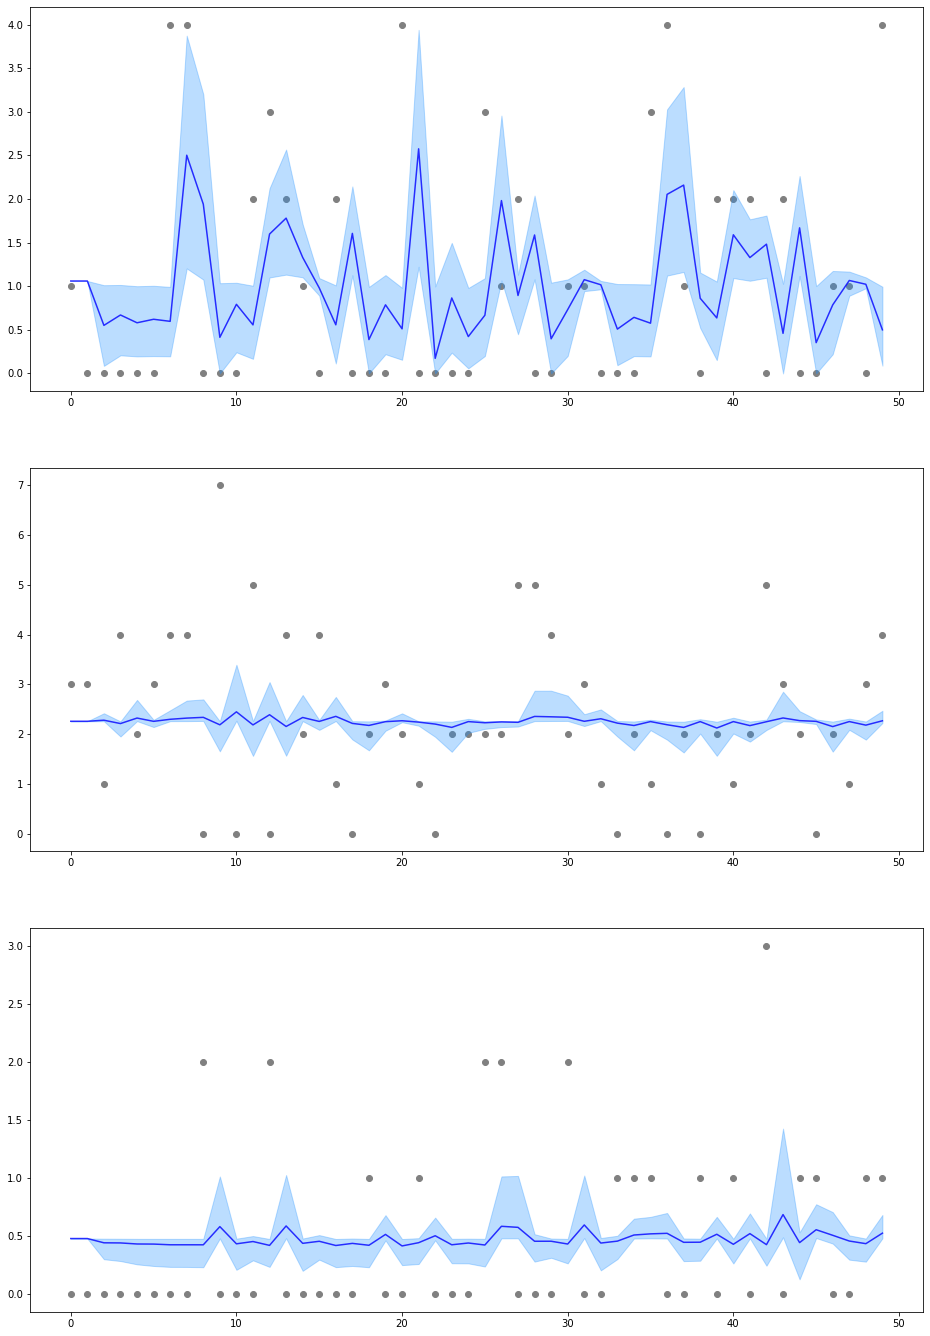

In [111]:
fig, axes = plt.subplots(num_of_series, 1, figsize=(16, 8 * num_of_series))
x = np.arange(0, num_of_steps)
for idx, ax in enumerate(axes):
    ax.scatter(x, raw_y[idx], c='grey')
    ax.plot(x, yhat_med[idx], color='blue', alpha=0.8);
    ax.fill_between(x=x, y1=yhat_lower[idx], y2=yhat_upper[idx], color='dodgerblue', alpha=0.3);

Optimization seems not working properly.

In [29]:
ss_fit = ss_mod.optimizing(
    data=data,
)

Initial log joint probability = -243.689
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -82.7803     0.0424675      0.789895           1           1       27   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      39      -82.5125       0.43176      0.773086           1           1       49   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59      -82.4725     0.0933704      0.272702           1           1       73   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79      -82.4662     0.0345118     0.0471585           1           1       95   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99      -82.4647      0.156953      0.116668           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [30]:
states = ss_fit['a']
lambda_ = np.expand_dims(ss_fit['lambda'], -1)
yhat_med = np.power(1 + lambda_ * states, 1 / lambda_)[:, :-1] * normalizer_y

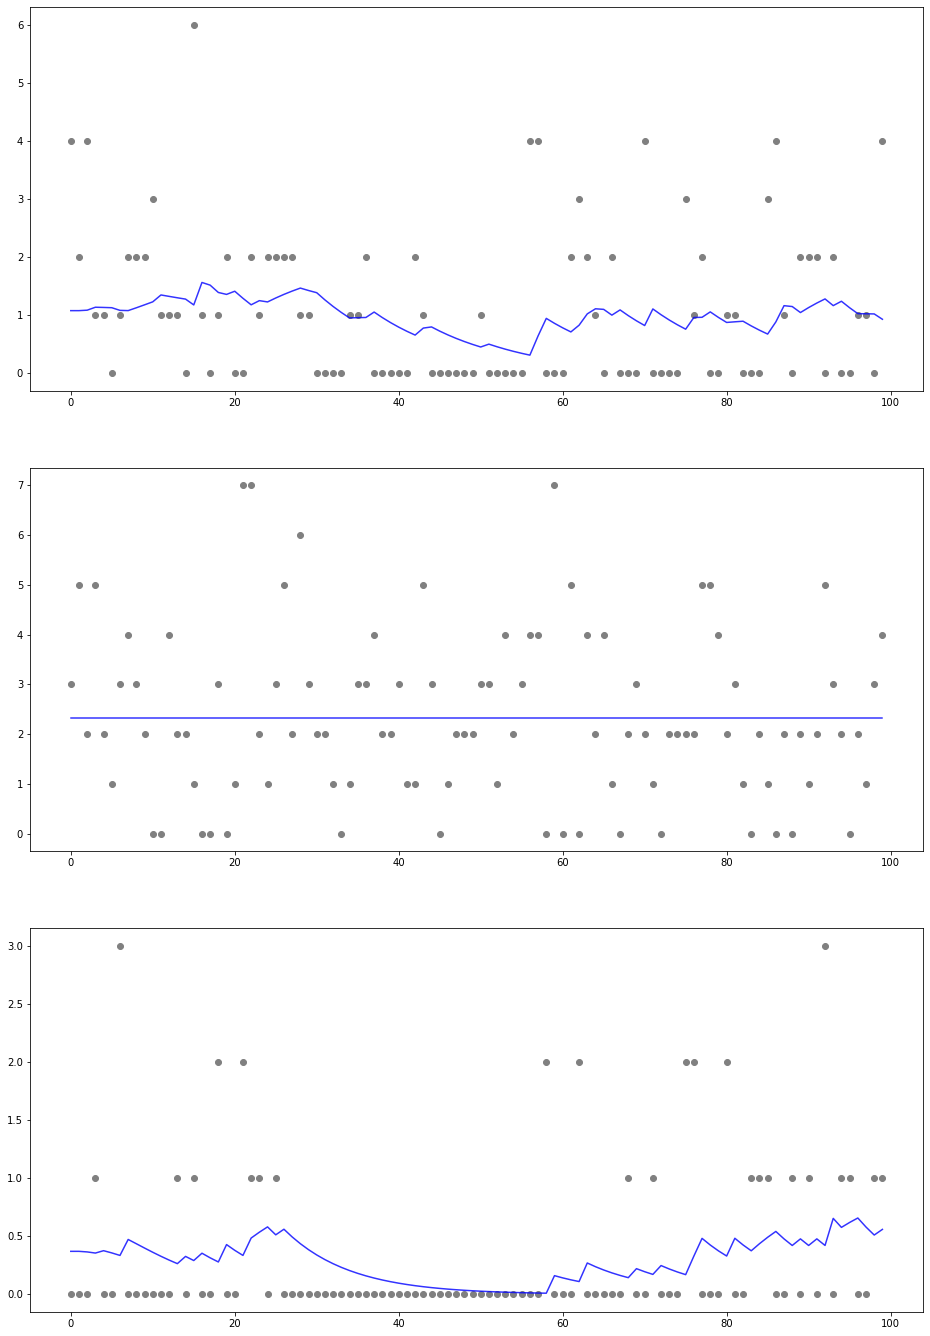

In [31]:
fig, axes = plt.subplots(num_of_series, 1, figsize=(16, 8 * num_of_series))
x = np.arange(0, num_of_steps)
for idx, ax in enumerate(axes):
    ax.scatter(x, raw_y[idx], c='grey')
    ax.plot(x, yhat_med[idx], color='blue', alpha=0.8);